In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_palette('crest')

In [ ]:
df = pd.read_csv('..\data\carsales.csv').drop(columns=['Car_id'])

: 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           23906 non-null  object
 1   Customer Name  23905 non-null  object
 2   Gender         23906 non-null  object
 3   Annual Income  23906 non-null  int64 
 4   Dealer_Name    23906 non-null  object
 5   Company        23906 non-null  object
 6   Model          23906 non-null  object
 7   Engine         23906 non-null  object
 8   Transmission   23906 non-null  object
 9   Color          23906 non-null  object
 10  Price ($)      23906 non-null  int64 
 11  Dealer_No      23906 non-null  object
 12  Body Style     23906 non-null  object
 13  Phone          23906 non-null  int64 
 14  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(12)
memory usage: 2.7+ MB


: 

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = pd.to_datetime(df['Date'], format='%m/%Y')

: 

In [ ]:
df.head()

: 

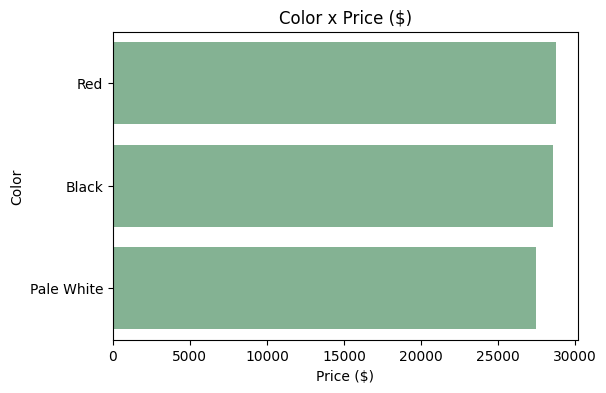

: 

In [ ]:
price_per_color = df.groupby(['Color'])['Price ($)'].mean().reset_index(
).sort_values('Price ($)', ascending=False)
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=price_per_color, x='Price ($)', y='Color')
ax.set_title('Color x Price ($)');

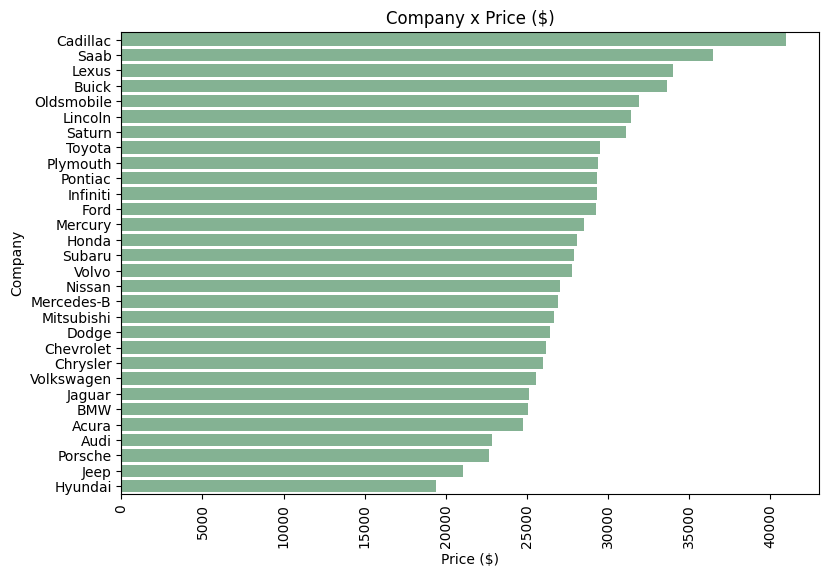

: 

In [ ]:
price_per_company = df.groupby(['Company'])['Price ($)'].mean().reset_index(
).sort_values('Price ($)', ascending=False)
plt.figure(figsize=(9, 6))
ax = sns.barplot(data=price_per_company, x='Price ($)', y='Company')
ax.set_title('Company x Price ($)')
plt.xticks(rotation=90);

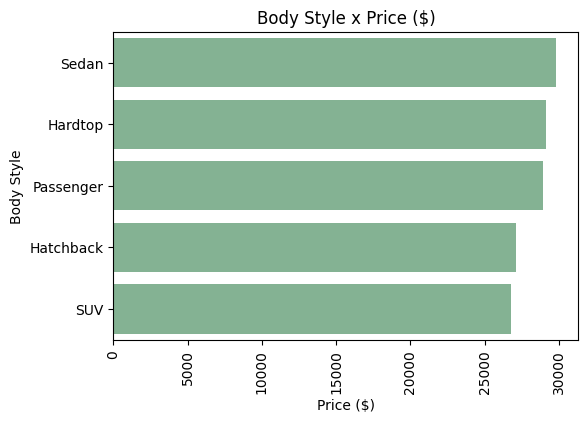

: 

In [ ]:
price_per_body = df.groupby(['Body Style'])['Price ($)'].mean().reset_index(
).sort_values('Price ($)', ascending=False)
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=price_per_body, x='Price ($)', y='Body Style')
ax.set_title('Body Style x Price ($)')
plt.xticks(rotation=90);

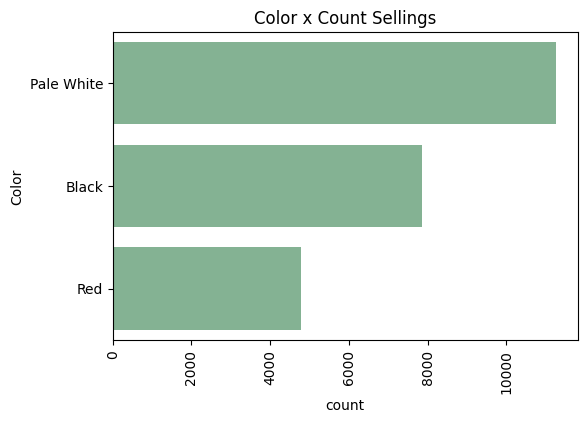

: 

In [ ]:
best_selling_car_colors = df['Color'].value_counts().reset_index()
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=best_selling_car_colors, x='count', y='Color')
ax.set_title('Color x Count Sellings')
plt.xticks(rotation=90);

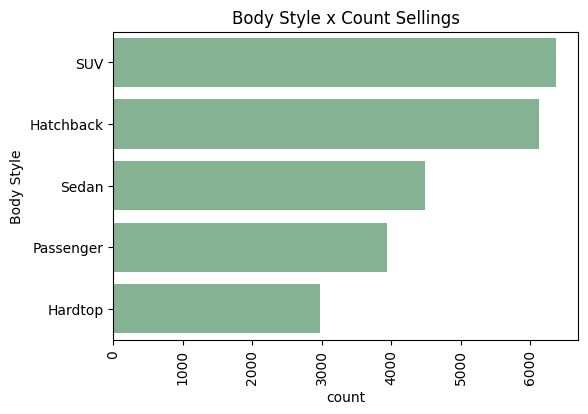

: 

In [ ]:
best_selling_car_body= df['Body Style'].value_counts().reset_index()
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=best_selling_car_body, x='count', y='Body Style')
ax.set_title('Body Style x Count Sellings')
plt.xticks(rotation=90);

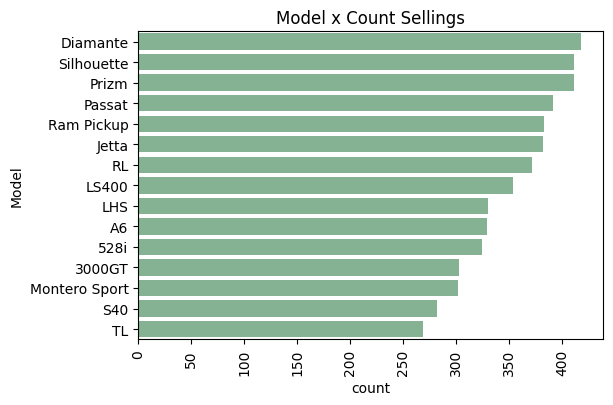

: 

In [ ]:
best_selling_car_model= df['Model'].value_counts().reset_index()[:15]
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=best_selling_car_model, x='count', y='Model')
ax.set_title('Model x Count Sellings')
plt.xticks(rotation=90);

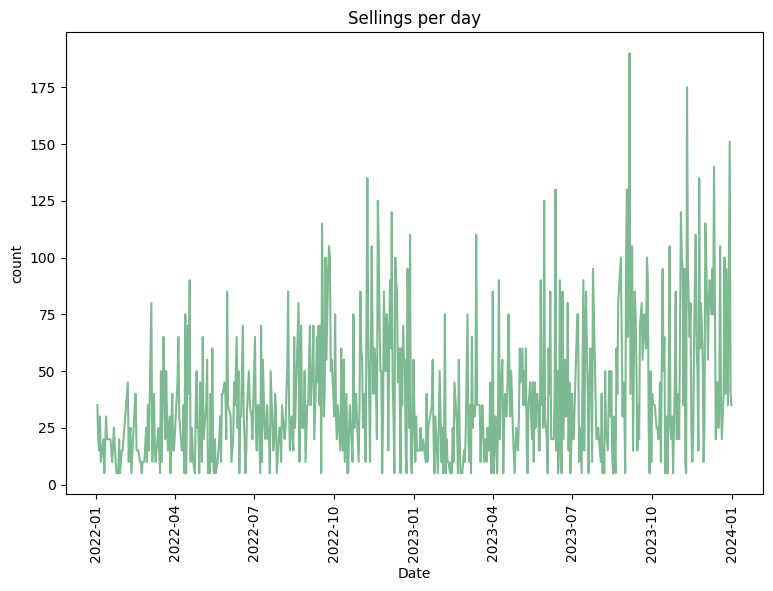

: 

In [ ]:
sellings_per_day = df['Date'].value_counts().reset_index()
sellings_per_day = sellings_per_day.sort_values(by='Date')
plt.figure(figsize=(9, 6))
ax = sns.lineplot(data=sellings_per_day, x='Date', y='count')
ax.set_title('Sellings per day')
plt.xticks(rotation=90);

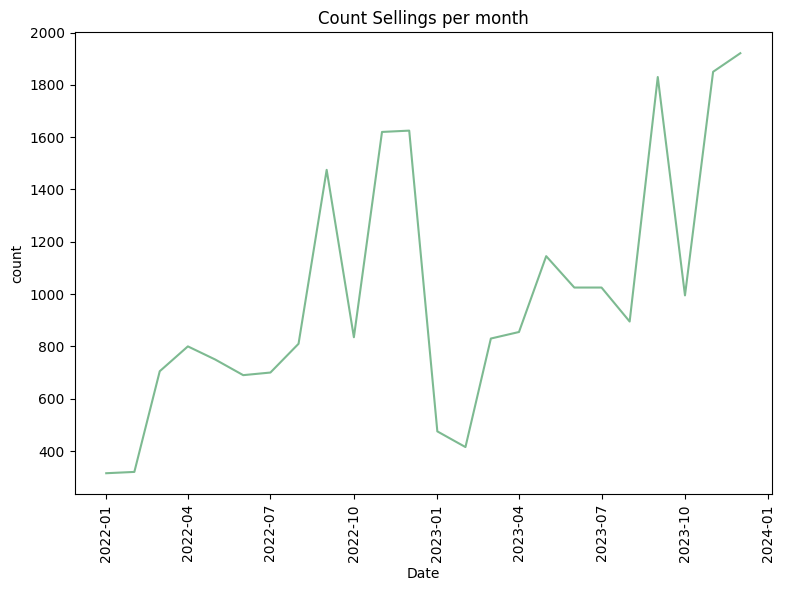

: 

In [ ]:
count_sellings_per_month = sellings_per_day['Date'].apply(lambda x: f'{x.month}/{x.year}')
count_sellings_per_month = pd.concat([count_sellings_per_month, sellings_per_day['count']], axis=1)
count_sellings_per_month['Date'] = pd.to_datetime(count_sellings_per_month['Date'], format='%m/%Y')
count_sellings_per_month = count_sellings_per_month.groupby(['Date'])['count'].sum().reset_index()
count_sellings_per_month.sort_values(by='Date')
plt.figure(figsize=(9, 6))
ax = sns.lineplot(data=count_sellings_per_month, x='Date', y='count')
ax.set_title('Count Sellings per month')
plt.xticks(rotation=90);

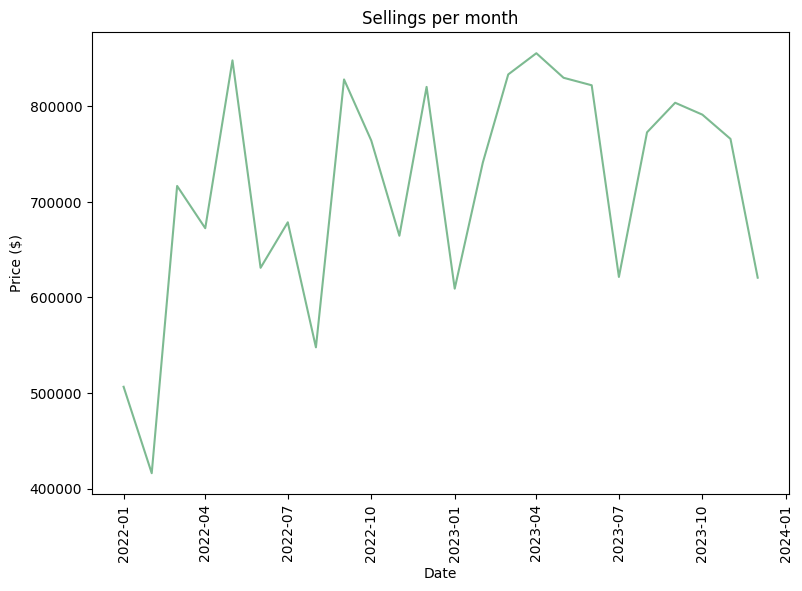

: 

In [ ]:
sellings_per_month = sellings_per_day['Date'].apply(lambda x: f'{x.month}/{x.year}')
sellings_per_month = pd.concat([sellings_per_month, df['Price ($)']], axis=1)
sellings_per_month['Date'] = pd.to_datetime(sellings_per_month['Date'], format='%m/%Y')
sellings_per_month = sellings_per_month.groupby(['Date'])['Price ($)'].sum().reset_index()
sellings_per_month.sort_values(by='Date')
plt.figure(figsize=(9, 6))
ax = sns.lineplot(data=sellings_per_month, x='Date', y='Price ($)')
ax.set_title('Sellings per month')
plt.xticks(rotation=90);

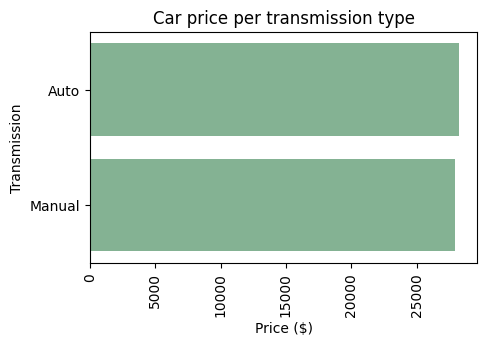

: 

In [ ]:
transmission_car_price = df.groupby(['Transmission'])['Price ($)'].mean().reset_index()
plt.figure(figsize=(5, 3))
ax = sns.barplot(data=transmission_car_price, x='Price ($)', y='Transmission')
ax.set_title('Car price per transmission type')
plt.xticks(rotation=90);

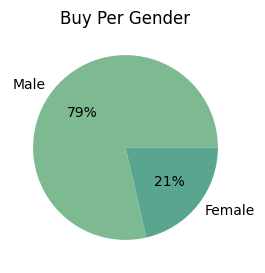

: 

In [ ]:
buy_per_gender = df['Gender'].value_counts().reset_index()
plt.figure(figsize=(5, 3))
ax = plt.pie(data=buy_per_gender, labels='Gender', x='count', autopct='%.0f%%')
plt.title('Buy Per Gender');

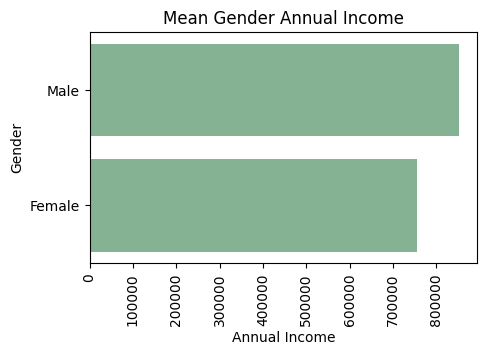

: 

In [ ]:
annual_income_mean = df.groupby(['Gender'])['Annual Income'].mean().reset_index(
).sort_values(by='Annual Income', ascending=False)
plt.figure(figsize=(5, 3))
ax = sns.barplot(data=annual_income_mean, x='Annual Income', y='Gender')
ax.set_title('Mean Gender Annual Income')
plt.xticks(rotation=90);

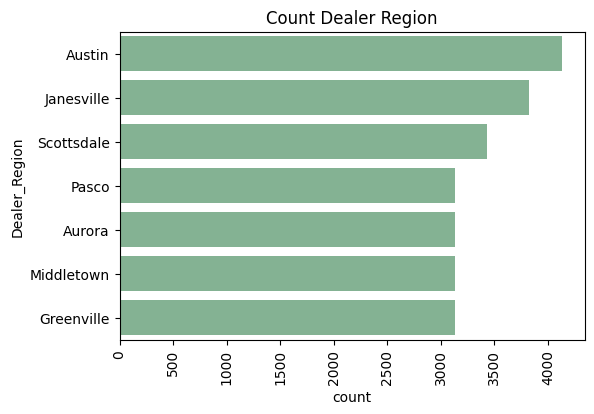

: 

In [ ]:
count_dealer_region = df['Dealer_Region'].value_counts().reset_index()
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=count_dealer_region, x='count', y='Dealer_Region')
ax.set_title('Count Dealer Region')
plt.xticks(rotation=90);